### 📂 Session Setup – Qualifying 2024 vs 2025

This notebook loads and prepares qualifying session data from both 2024 and 2025 at Barcelona.  
It enables side-by-side comparisons of driver performance across seasons using FastF1’s telemetry and lap data tools.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
# Add path to your improved delta method
import sys
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1')
from delta_time_sector_constrained import delta_time
import matplotlib.colors as mcolors
import warnings
import matplotlib.image as mpimg
import os
import sys


In [4]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session1 = fastf1.get_session(2025, 'Hungary Grand Prix', 'FP2')
session1.load()
# In this way i Can exclude the box laps
laps1 = session1.laps.pick_wo_box()

# Pick just the accurate laps
laps1 = laps1[laps1['IsAccurate']==True]

circuit_info = session1.get_circuit_info()




/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(
req         WARNING 	DEFAULT CACHE ENABLED! (2.47 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            

In [5]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session2 = fastf1.get_session(2025, 'Hungary Grand Prix', 'R')
session2.load()
# In this way i Can exclude the box laps
laps2 = session2.laps.pick_wo_box()

# Pick just the accurate laps
laps2 = laps2[laps2['IsAccurate']==True]

circuit_info = session2.get_circuit_info()




/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req    

In [6]:
drivers1=laps1['Driver'].unique()
compounds1 = laps1['Compound'].unique()

drivers2 =laps2['Driver'].unique()
compounds2 = laps2['Compound'].unique()


In [7]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

### ⏱️ Lap Time Transformation and Team Sorting

Lap times are converted into seconds for accurate statistical analysis.  
Teams are then ranked by median lap time to evaluate relative performance gains or losses between the two years.

In [8]:
# Transform the laps in total seconds
transformed_laps1 = laps1.copy()
transformed_laps1.loc[:, "LapTime (s)"] = laps1["LapTime"].dt.total_seconds()

transformed_laps2 = laps2.copy()
transformed_laps2.loc[:, "LapTime (s)"] = laps2["LapTime"].dt.total_seconds()


# order the team from the fastest (lowest median lap time) to slower
team_order1 = (
    transformed_laps1[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# order the team from the fastest (lowest median lap time) to slower
team_order2 = (
    transformed_laps2[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# Manually assign official or visually appropriate colors to each team
TEAM_COLORS = {
    'McLaren': '#FF8700',         # Papaya
    'Ferrari': '#DC0000',         # Classic red
    'Red Bull Racing': '#1E41FF', # Deep blue
    'Mercedes': '#00D2BE',        # Teal
    'Williams': '#005AFF',        # Royal blue
    'Racing Bulls': '#6692FF',    # Light blue
    'Kick Sauber': '#90EE90',     # Light green
    'Alpine': '#FE86BC',          # Pinkish magenta
    'Haas F1 Team': '#B6BABD',    # Silver/gray
    'Aston Martin': '#006F62',    # Racing green
}

# Assign team colors safely
def get_team_color(team):
    team = team.strip()
    return TEAM_COLORS.get(team, '#000000')  # fallback to black

# Create the palette
team_palette = {team: get_team_color(team) for team in team_order1}


In [9]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "DOO": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [10]:
from scipy.interpolate import PchipInterpolator

def interpolate_dataframe(df):
    target_points=5000
    new_df = pd.DataFrame()
    n = len(df)

    original_index = np.linspace(0, 1, n)
    new_index = np.linspace(0, 1, target_points)

    for column in df.columns:
        original_data = df[column].to_numpy()
        dtype = original_data.dtype

        # Handle continuous numerical values
        if np.issubdtype(dtype, np.floating):
            interpolator = PchipInterpolator(original_index, original_data)
            new_data = interpolator(new_index)

        # Handle datetime64
        elif np.issubdtype(dtype, np.datetime64):
            time_int = original_data.astype('datetime64[ns]').astype('int64')
            interpolator = PchipInterpolator(original_index, time_int)
            new_data = pd.to_datetime(interpolator(new_index))

        # Handle timedelta64
        elif np.issubdtype(dtype, np.timedelta64):
            time_int = original_data.astype('timedelta64[ns]').astype('int64')
            interpolator = PchipInterpolator(original_index, time_int)
            new_data = pd.to_timedelta(interpolator(new_index))

        # Handle integer-like data (e.g., gears) – round PCHIP
        elif np.issubdtype(dtype, np.integer):
            interpolator = PchipInterpolator(original_index, original_data)
            new_data = np.round(interpolator(new_index)).astype(original_data.dtype)

        # Handle booleans – use nearest (forward-fill style)
        elif np.issubdtype(dtype, np.bool_):
            nearest_indices = np.clip(np.round(new_index * (n - 1)).astype(int), 0, n - 1)
            new_data = original_data[nearest_indices]

        # Handle strings/objects – use nearest
        else:
            nearest_indices = np.clip(np.round(new_index * (n - 1)).astype(int), 0, n - 1)
            new_data = original_data[nearest_indices]

        new_df[column] = new_data

    return new_df

In [11]:
import os
os.chdir('/Users/PietroPaolo/Desktop/GitHub/F1/')
print("Current directory:", os.getcwd())  # Should now print `/Users/PietroPaolo/Desktop/GitHub/F1/`

Current directory: /Users/PietroPaolo/Desktop/GitHub/F1


In [12]:
import sys
import import_ipynb

# Add the parent directory to the Python module search path
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')

# Import the RacePaceAnalyzer class from the notebook
from model_prediction_race_pace import RacePaceAnalyzer

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(
core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_

Transformed laps for Bahrain Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Saudi Arabian Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Japanese Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core  

Transformed laps for Australian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Japanese Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Canadian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Emilia Romagna Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Canadian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for British Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Spanish Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for British Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Belgian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Hungarian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Dutch Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Belgian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Dutch Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '63', '77', '81']


Transformed laps for Italian Grand Prix FP2 loaded successfully.


core           INFO 	Loading data for Singapore Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '63', '77', '81']
events      WARNING 	Correcting user input 'Mexican Grand Prix' to 'Mexico City Grand Prix'
core          

Transformed laps for Singapore Grand Prix FP2 loaded successfully.


core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Las Vegas Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Mexican Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Las Vegas Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '43', '44', '55', '61', '63', '77', '81']


Transformed laps for Abu Dhabi Grand Prix FP2 loaded successfully.
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.97      0.89      0.93        37

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60

Pipeline saved to race_pace_pipeline.pkl


In [13]:
# Example: Analyze event data
# Initialize the analyzer
# Example: Analyze event data
# Initialize the analyzer
analyzer = RacePaceAnalyzer()

# Load the pipeline
analyzer.load_model(path='race_pace_pipeline.pkl')

race_pace_laps_fp2 = analyzer.get_race_pace_laps(transformed_laps1)


Pipeline loaded successfully


In [14]:
leclerc_stint1_race = transformed_laps2[(transformed_laps2["Driver"] == "LEC") & (transformed_laps2["Stint"] == 1.0)]

leclerc_stint_fp2 = race_pace_laps_fp2[(race_pace_laps_fp2["Driver"] == "LEC")]

In [15]:

class LeclercStintStyledPlot:
    def __init__(self, race_stint_df, fp2_df):
        self.race_stint_df = race_stint_df.copy().reset_index(drop=True)
        self.fp2_df = fp2_df.copy().reset_index(drop=True)

        # Start from Lap 1
        self.race_stint_df['LapNumber'] = range(1, len(self.race_stint_df) + 1)
        self.fp2_df['LapNumber'] = range(1, len(self.fp2_df) + 1)

    def plot(self, title="Leclerc - Race Stint 1 vs FP2 Pace"):
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_facecolor('#0f111a'); fig.patch.set_facecolor('#0f111a')
        ax.grid(True, linestyle='--', alpha=0.4)

        # Plot lines
        ax.plot(
            self.race_stint_df['LapNumber'],
            self.race_stint_df['LapTime (s)'],
            color='red',
            linewidth=2.5,
            alpha=0.85,
            solid_capstyle='round'
        )
        ax.plot(
            self.fp2_df['LapNumber'],
            self.fp2_df['LapTime (s)'],
            color='white',
            linewidth=2.5,
            alpha=0.85,
            solid_capstyle='round'
        )

        # Y-axis formatting
        def format_time(x, pos):
            minutes = int(x // 60)
            seconds = x % 60
            return f"{minutes}:{seconds:04.1f}"
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_time))

        # Axis + title styling
        ax.set_xlabel("Lap", color='white', fontsize=14)
        ax.set_ylabel("Lap Time", color='white', fontsize=14)
        ax.set_title(title, color='white', fontsize=20)
        ax.tick_params(colors='white')
        for spine in ax.spines.values():
            spine.set_edgecolor('#44475a')

        # Inline end-of-line labels instead of legend
        race_last = self.race_stint_df.iloc[-1]
        fp2_last = self.fp2_df.iloc[-1]

        ax.text(
            race_last['LapNumber'] + 0.5,
            race_last['LapTime (s)'],
            "Race Stint 1",
            color='red',
            fontsize=11,
            fontweight='bold',
            va='center'
        )
        ax.text(
            fp2_last['LapNumber'] + 0.5,
            fp2_last['LapTime (s)'],
            "FP2 Pace",
            color='white',
            fontsize=11,
            fontweight='bold',
            va='center'
        )

        # Signature
        fig.text(0.9, 0.88, "Provided by:\nPietro Paolo Melella",
                 ha='right', va='bottom', color='white', fontsize=13)

        plt.tight_layout()
        # Add logo below the "Provided by" text
        sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
        logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

        if os.path.exists(logo_path):
            logo_img = mpimg.imread(logo_path)
            # [left, bottom, width, height] — values are in 0–1 relative figure coords
            logo_ax = fig.add_axes([0.80, 0.75, 0.12, 0.12], anchor='NE', zorder=10)
            logo_ax.imshow(logo_img)
            logo_ax.axis('off')
        else:
            print(f"[WARN] Logo file not found at: {logo_path}")
        plt.show()

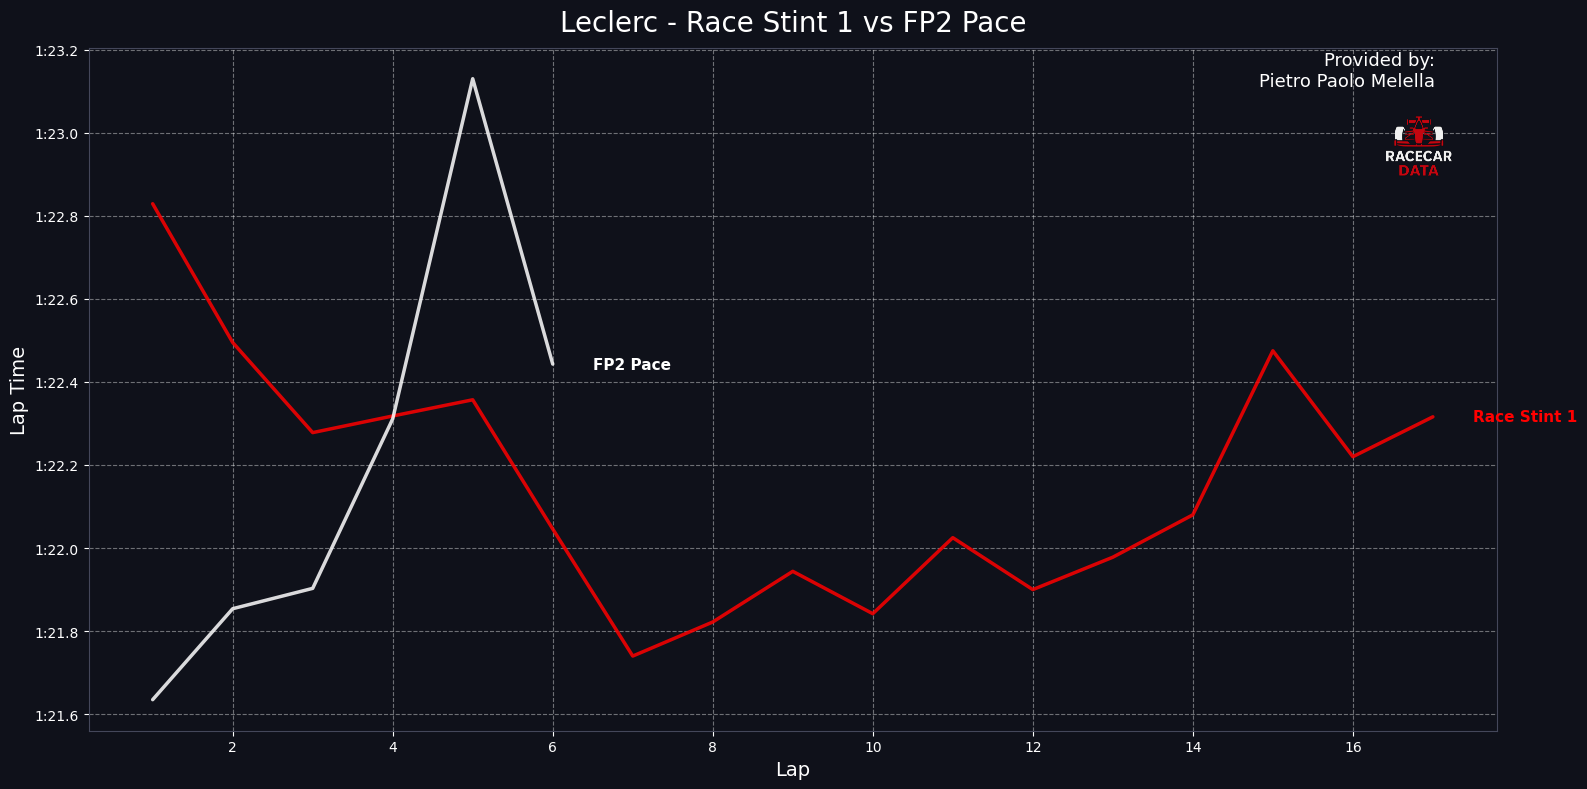

In [16]:
plotter = LeclercStintStyledPlot(leclerc_stint1_race, leclerc_stint_fp2)
plotter.plot()

In [17]:
import warnings
from scipy.signal import savgol_filter

# ignore only the FastF1 deprecation warning about delta_time
warnings.filterwarnings(
    "ignore",
    message="`utils.delta_time` is considered deprecated.*",
    category=FutureWarning
)

class FastestLap:
    """
    Wraps a fastest-lap record and provides convenience accessors.
    Expects lap to have ['Driver','Sector1Time','Sector2Time'] and get_car_data().
    """
    def __init__(self, lap):
        self.name = lap['Driver']
        self.s1_time = lap['Sector1Time']
        self.s2_time = lap['Sector2Time']
        df = lap.get_car_data().add_distance()
        self.df = interpolate_dataframe(df)

    @property
    def sector_distances(self):
        d1 = self.df[self.df['Time'] <= self.s1_time]['Distance'].max()
        d2 = self.df[self.df['Time'] <= (self.s1_time + self.s2_time)]['Distance'].max()
        return d1, d2


def compute_acceleration(df, smooth=True, clip_range=(-6, 6)):
    df = df.copy()
    df['Speed_ms'] = df['Speed'] / 3.6

    df['Distance'] = df['Distance'].interpolate()
    dv_dx = np.gradient(df['Speed_ms'], df['Distance'])

    df['Acc'] = dv_dx * df['Speed_ms']

    if smooth:
        try:
            wl = 27
            if wl >= len(df):
                wl = len(df) - (1 - len(df) % 2)
            if wl >= 3:
                df['Acc'] = savgol_filter(df['Acc'], window_length=wl, polyorder=2)
        except Exception:
            pass

    if clip_range:
        df['Acc'] = df['Acc'].clip(*clip_range)

    return df


def adjust_brightness(color, factor):
    """
    Lighten (factor>1) or darken (factor<1) an RGB color.
    """
    try:
        rgb = np.array(mcolors.to_rgb(color))
        # scale and clip
        adjusted = np.clip(rgb * factor, 0, 1)
        return mcolors.to_hex(adjusted)
    except Exception:
        return color  # fallback


def assign_colors(driver_specs, driver_color_map=None, default_colors=None, fallback_shades=None):
    """
    Returns a list of colors for each spec in driver_specs (order preserved).
    Priority: driver_color_map[display_name] > driver_color_map[driver] > default_colors[driver] > 'white'
    Applies fallback shades when base color repeats; if exhausted, auto-adjust brightness.
    """
    if default_colors is None:
        default_colors = {}
    if fallback_shades is None:
        fallback_shades = {
            'red': ['white', 'lightcoral'],
            'blue': ['cyan', 'lightblue'],
            'orange': ['white', 'wheat'],
            'grey': ['white', 'silver'],
            'green': ['lime', 'springgreen'],
            'pink': ['violet', 'lightpink'],
            'olive': ['khaki'],
            'navy': ['skyblue'],
            '#9932CC': ['plum'],
            'lime': ['yellowgreen']
        }

    used = {}
    palette = []
    for spec in driver_specs:
        driver = spec['driver']
        display = spec['display_name']

        # Determine base color
        base_color = None
        if driver_color_map:
            base_color = driver_color_map.get(display, driver_color_map.get(driver))
        if base_color is None:
            base_color = default_colors.get(driver, 'white')

        count = used.get(base_color, 0)
        if count == 0:
            color = base_color
        else:
            # try fallback shades first
            alternates = fallback_shades.get(base_color, [])
            if count - 1 < len(alternates):
                color = alternates[count - 1]
            else:
                # auto adjust brightness for further duplicates
                # alternate lighten/darken
                factor = 1 + 0.2 * ((count - len(alternates)) % 2) * (1 if ((count - len(alternates)) // 2) % 2 == 0 else -1)
                color = adjust_brightness(base_color, factor)
        used[base_color] = count + 1
        palette.append(color)

    return palette


def compare_laps(fp2_lap_number, race_lap_number, channels=['Speed', 'Throttle', 'Brake', 'Delta'], session_label='Q'):
    """
    Compare specific Leclerc laps between FP2 and Race sessions.
    
    Parameters:
    - fp2_lap_number: lap number from FP2 session (e.g., 5)
    - race_lap_number: lap number from Race session (e.g., 12)
    - channels: list of telemetry channels to plot
    - session_label: label for the comparison
    """
    
    # Get specific laps from your filtered data
    fp2_lap = leclerc_stint_fp2.pick_laps(fp2_lap_number).iloc[0]
    race_lap = leclerc_stint1_race.pick_laps(race_lap_number).iloc[0]
    
    # Get telemetry data
    fp2_telemetry = fp2_lap.get_car_data().add_distance()
    race_telemetry = race_lap.get_car_data().add_distance()
    
    # Interpolate data
    fp2_telemetry = interpolate_dataframe(fp2_telemetry)
    race_telemetry = interpolate_dataframe(race_telemetry)
    
    # Add acceleration
    fp2_telemetry = compute_acceleration(fp2_telemetry)
    race_telemetry = compute_acceleration(race_telemetry)
    
    # Get weather data for both sessions
    weather1 = session1.weather_data  # FP2
    weather2 = session2.weather_data  # Race
    
    # Get weather at the time of each lap
    fp2_lap_time = fp2_lap['Time']
    race_lap_time = race_lap['Time']
    
    # Find closest weather data to lap times
    fp2_weather_idx = np.abs(weather1['Time'] - fp2_lap_time).idxmin()
    race_weather_idx = np.abs(weather2['Time'] - race_lap_time).idxmin()
    
    fp2_air_temp = weather1.loc[fp2_weather_idx, 'AirTemp']
    fp2_track_temp = weather1.loc[fp2_weather_idx, 'TrackTemp']
    race_air_temp = weather2.loc[race_weather_idx, 'AirTemp']
    race_track_temp = weather2.loc[race_weather_idx, 'TrackTemp']
    
    # Check if Delta is requested
    wants_delta = any(ch.lower() == 'delta' for ch in channels)
    plot_channels = [ch for ch in channels if ch.lower() != 'delta']
    
    # Plot setup
    n_plots = len(plot_channels) + (1 if wants_delta else 0)
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 3.5 * n_plots), sharex=True)
    if n_plots == 1:
        axes = [axes]
    plt.style.use('dark_background')
    
    # Colors
    fp2_color = '#C92D4B'  # Ferrari red
    race_color = 'white'  # Ferrari orange
    
    # Units
    units = {
        'Speed': 'km/h',
        'Throttle': '%',
        'Brake': '%',
        'RPM': 'rpm',
        'nGear': '',
        'DRS': '',
        'Acc': 'm/s²',
    }
    
    # Get sector lines for visual reference
    fl_fp2 = FastestLap(fp2_lap)
    s1_dist, s2_dist = fl_fp2.sector_distances
    
    # Plot regular channels
    for i, channel in enumerate(plot_channels):
        ax = axes[i]
        
        # Plot FP2 and Race data
        if channel in fp2_telemetry.columns:
            ax.plot(fp2_telemetry['Distance'], fp2_telemetry[channel], 
                    color=fp2_color, label=f'LEC FP2 Lap {fp2_lap_number}', linewidth=2)
        if channel in race_telemetry.columns:
            ax.plot(race_telemetry['Distance'], race_telemetry[channel], 
                    color=race_color, label=f'LEC Race Lap {race_lap_number}', linewidth=2)
        
        unit = units.get(channel, '')
        ax.set_ylabel(f"{channel} ({unit})" if unit else channel, color='white')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        ax.tick_params(colors='white')
        
        # Add sector lines
        ax.axvline(s1_dist, color='white', linestyle='--', alpha=0.7)
        ax.axvline(s2_dist, color='white', linestyle='--', alpha=0.7)
        
        # Add corner markers if available
        if 'circuit_info' in globals():
            corner_df = circuit_info.corners.copy().sort_values('Distance')
            zero_based = corner_df['Number'].min() == 0
            for _, row in corner_df.iterrows():
                num = int(row['Number']) + (1 if zero_based else 0)
                letter = ''
                if 'Letter' in row and pd.notna(row['Letter']) and str(row['Letter']).strip():
                    letter = str(row['Letter']).strip()
                label = f"{num}{letter}"
                ax.text(row['Distance'], ax.get_ylim()[0], label,
                        color='white', fontsize=8, ha='center', va='bottom')
    
    # Add delta plot if requested
    if wants_delta:
        ax_delta = axes[-1]
        delta_series, ref_tel, comp_tel = delta_time(fp2_lap, race_lap)
        
        # Plot delta with gradient colors like your reference
        ax_delta.plot(ref_tel['Distance'], delta_series, color=race_color, linewidth=2.5,
                     label=f'Δ (Race Lap {race_lap_number} - FP2 Lap {fp2_lap_number})')
        
        ax_delta.set_ylabel('Δ Time (s)', color='white')
        ax_delta.axhline(0, color=fp2_color, linestyle='--', linewidth=1.2, alpha=0.8)
        ax_delta.grid(True, alpha=0.3)
        ax_delta.tick_params(colors='white')
        
        # Add sector lines to delta plot
        ax_delta.axvline(s1_dist, color='white', linestyle='--', alpha=0.7)
        ax_delta.axvline(s2_dist, color='white', linestyle='--', alpha=0.7)
        
        # Set x-axis ticks every 500m
        ax_delta.xaxis.set_major_locator(plt.MultipleLocator(500))
        ax_delta.xaxis.set_minor_locator(plt.MultipleLocator(100))
        
        # Add benchmark info in legend style
        ax_delta.legend(loc='upper right', title=f"Benchmark: FP2 Lap {fp2_lap_number}")
        
        # Add corner markers for delta plot
        if 'circuit_info' in globals():
            corner_df = circuit_info.corners.copy().sort_values('Distance')
            zero_based = corner_df['Number'].min() == 0
            for _, row in corner_df.iterrows():
                num = int(row['Number']) + (1 if zero_based else 0)
                letter = ''
                if 'Letter' in row and pd.notna(row['Letter']) and str(row['Letter']).strip():
                    letter = str(row['Letter']).strip()
                label = f"{num}{letter}"
                ax_delta.text(row['Distance'], ax_delta.get_ylim()[0], label,
                            color='white', fontsize=8, ha='center', va='bottom')
    
    # Set x-axis ticks every 500m for all plots
    for ax in axes:
        ax.xaxis.set_major_locator(plt.MultipleLocator(500))
        ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    
    # Add lap time, weather info
    fp2_time = fp2_lap['LapTime'].total_seconds()
    race_time = race_lap['LapTime'].total_seconds()
    
    fp2_mins = int(fp2_time // 60)
    fp2_secs = fp2_time - fp2_mins * 60
    race_mins = int(race_time // 60)
    race_secs = race_time - race_mins * 60
    
    info_text = f"FP2 Lap {fp2_lap_number}: {fp2_mins}:{fp2_secs:06.3f}\n"
    info_text += f"  AIR: {fp2_air_temp:.1f}°C, TRACK: {fp2_track_temp:.1f}°C\n\n"
    info_text += f"Race Lap {race_lap_number}: {race_mins}:{race_secs:06.3f}\n"
    info_text += f"  AIR: {race_air_temp:.1f}°C, TRACK: {race_track_temp:.1f}°C"
    
    fig.text(0.02, 0.98, info_text, ha='left', va='top',
             color='white', fontsize=10,
             bbox=dict(facecolor='black', alpha=0.5, pad=4))
    
    fig.text(0.9, 0.96, "Provided by: Pietro Paolo Melella",
             ha='right', va='bottom', color='white', fontsize=15)
    
    
    
    plt.suptitle(f'Leclerc: FP2 Lap {fp2_lap_number} vs Race Lap {race_lap_number}', 
                 color='white', fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.90, 0.94])
    
    # Add logo below the "Provided by" text
    sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')
    logo_path = os.path.join('/Users/PietroPaolo/Desktop/GitHub/F1/', 'logo-square.png')  # or .jpg etc.

    if os.path.exists(logo_path):
        logo_img = mpimg.imread(logo_path)
        # [left, bottom, width, height] — values are in 0–1 relative figure coords
        logo_ax = fig.add_axes([0.80, 0.895, 0.08, 0.08], anchor='NE', zorder=10)
        logo_ax.imshow(logo_img)
        logo_ax.axis('off')
    else:
        print(f"[WARN] Logo file not found at: {logo_path}")
    plt.show()

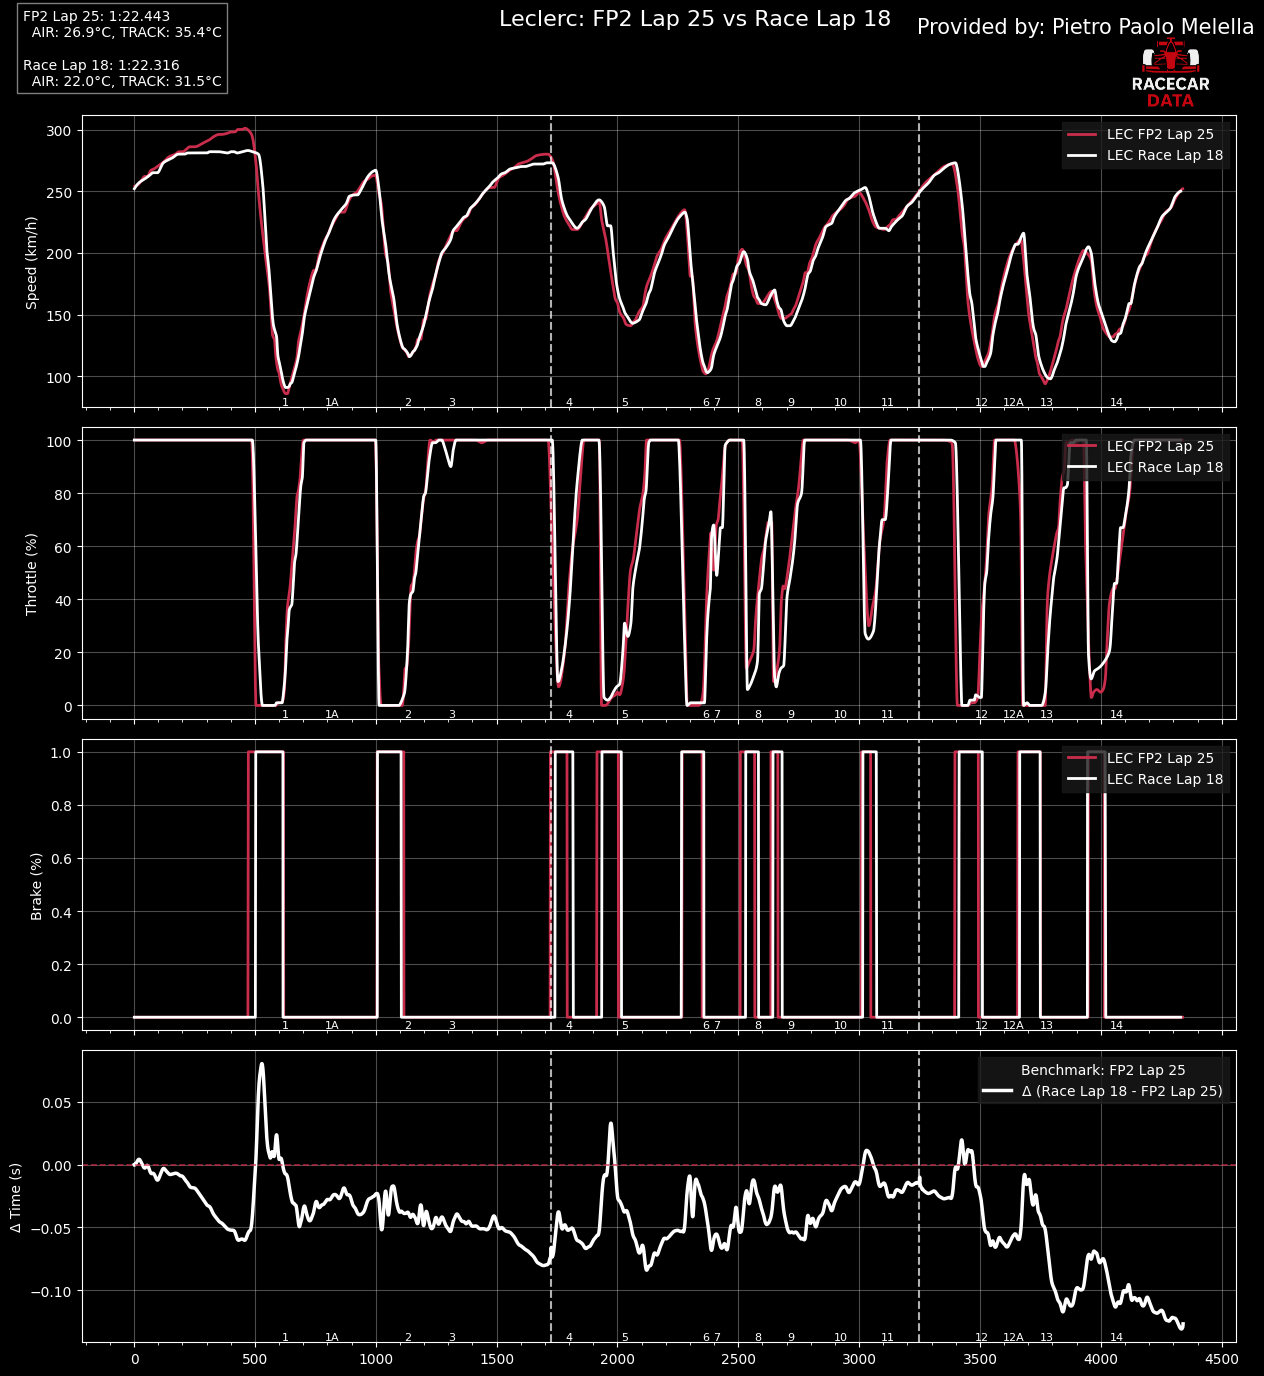

In [37]:
# Compare FP2 lap 5 with Race lap 12
compare_laps(25, 18, channels=['Speed', 'Throttle', 'Brake', 'Delta'])